<a href="https://colab.research.google.com/github/djswoosh/Uni-Bits/blob/main/Tensor_Flow_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
observations = 1000
xs = np.random.uniform(low =-10, high=10, size =(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

Solving with Tensor Flow

In [4]:
training_data = np.load('TF_intro.npz')

In [7]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                             ])
model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 917us/step - loss: 27.5836
Epoch 2/100
32/32 [==============================] - 0s 965us/step - loss: 4.5930
Epoch 3/100
32/32 [==============================] - 0s 906us/step - loss: 1.4673
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6400
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4250
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3338
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3458
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3398
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3337
Epoch 13/100
32/32 [==========

Extract the weights and bias

In [8]:
model.layers[0].get_weights()

[array([[ 1.9589257],
        [-3.0314305]], dtype=float32), array([4.9685], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9589257],
       [-3.0314305]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9685], dtype=float32)

Extract the outputs (make predicitons)

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-31.1],
       [  2.6],
       [ 28.6],
       [  1.6],
       [-33.6],
       [ 29.9],
       [ 11.1],
       [-14.1],
       [-12.4],
       [ 14.3],
       [ 43.9],
       [ -2.4],
       [ 36.6],
       [-20.8],
       [ 35.1],
       [ 30.2],
       [ 12.6],
       [ -4.7],
       [  2.8],
       [  1.7],
       [ 29.8],
       [ 28.2],
       [  9.7],
       [ 13.7],
       [-23. ],
       [  4.8],
       [ 21.5],
       [ 28.1],
       [ -5.5],
       [ 43.6],
       [  3.4],
       [ 26.8],
       [-10.4],
       [ 18.4],
       [ -8.3],
       [ -4.7],
       [  2.3],
       [  6.7],
       [ 17.5],
       [ 28.9],
       [ 15.5],
       [ -8.6],
       [ -2.3],
       [-25.3],
       [-26.2],
       [-29.1],
       [-16.8],
       [  4.8],
       [-35.1],
       [ 35.3],
       [ 22.1],
       [  0.1],
       [ 34.9],
       [-35.6],
       [ -8.4],
       [ 13.5],
       [ -6.3],
       [ 12.3],
       [ -8. ],
       [-10.7],
       [-33.4],
       [ -5.7],
       [

In [13]:
training_data['targets'].round(1)

array([[-31.4],
       [  2.8],
       [ 30. ],
       [  0.8],
       [-33.3],
       [ 30.3],
       [ 11.5],
       [-13.4],
       [-13.3],
       [ 14. ],
       [ 44. ],
       [ -3.5],
       [ 36.3],
       [-20.6],
       [ 34.5],
       [ 29.5],
       [ 13.4],
       [ -4. ],
       [  2.7],
       [  2.1],
       [ 28.9],
       [ 29.2],
       [  9.7],
       [ 13.1],
       [-23.8],
       [  4.6],
       [ 20.9],
       [ 28.5],
       [ -6.9],
       [ 43.3],
       [  2.8],
       [ 26.9],
       [-10.1],
       [ 18.7],
       [ -7.8],
       [ -4.5],
       [  1.8],
       [  5.9],
       [ 18.3],
       [ 28.4],
       [ 15.1],
       [ -8.7],
       [ -2. ],
       [-24.4],
       [-26.8],
       [-30.1],
       [-17.2],
       [  4.9],
       [-34.3],
       [ 35.7],
       [ 22. ],
       [  0.1],
       [ 34.2],
       [-34.7],
       [ -7.6],
       [ 13.1],
       [ -6.4],
       [ 13.2],
       [ -7.7],
       [-10.1],
       [-33.9],
       [ -4.3],
       [

Plottting the data

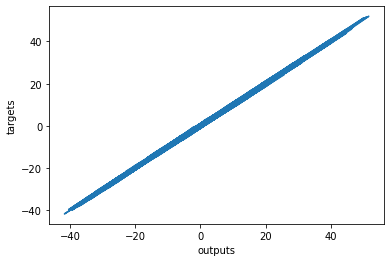

In [17]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()